# 🚕 Bengaluru Ola Dataset - Exploratory Data Analysis (EDA)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Bengaluru Ola.csv")
df.head()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating
0,28/01/2024,6:00:00,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,...,NaN,0,NaN,0,NaN,868.06,Wallet,28.5,4.4,4.4
1,26/01/2024,3:00:00,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,NaN,NaN,...,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
2,15/01/2024,16:00:00,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,NaN,NaN,...,NaN,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN,NaN
3,02/01/2024,22:00:00,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,NaN,NaN,...,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
4,30/01/2024,22:00:00,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,NaN,NaN,...,NaN,0,NaN,1,Other Issue,NaN,NaN,NaN,NaN,NaN


## 1. Basic EDA


In [3]:
print("\n--- Basic Info ---")
print(df.info())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               49999 non-null  object 
 1   Time                               49999 non-null  object 
 2   Booking ID                         49999 non-null  object 
 3   Booking Status                     49999 non-null  object 
 4   Customer ID                        49999 non-null  int64  
 5   Vehicle Type                       49999 non-null  object 
 6   Pickup Location                    49999 non-null  object 
 7   Drop Location                      49999 non-null  object 
 8   Avg VTAT                           33484 non-null  float64
 9   Avg CTAT                           33484 non-null  float64
 10  Cancelled  by Customer             49999 non-null  int64  
 11  Reason for Cancelling by Customer 

In [4]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             16515
Avg CTAT                             16515
Cancelled  by Customer                   0
Reason for Cancelling by Customer    46200
Cancelled Rides by Driver                0
Reason for Cancelling by Driver      40389
Incomplete Rides                         0
Incomplete Rides Reason              46893
Booking Value                        16515
Payment Method                       16515
Ride Distance                        16515
Driver Ratings                       16515
Customer Rating                      16515
dtype: int64


In [5]:
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))


--- Summary Statistics ---
              Date     Time  Booking ID Booking Status    Customer ID  \
count        49999    49999       49999          49999   49999.000000   
unique          31       24       49866              4            NaN   
top     12/01/2024  0:00:00  CNR1569898        Success            NaN   
freq          1766     2171           2          33484            NaN   
mean           NaN      NaN         NaN            NaN  550979.937539   
std            NaN      NaN         NaN            NaN  258855.930945   
min            NaN      NaN         NaN            NaN  100001.000000   
25%            NaN      NaN         NaN            NaN  328740.500000   
50%            NaN      NaN         NaN            NaN  552598.000000   
75%            NaN      NaN         NaN            NaN  773970.000000   
max            NaN      NaN         NaN            NaN  999991.000000   

       Vehicle Type Pickup Location Drop Location      Avg VTAT      Avg CTAT  \
count         

## 2. NumPy Questions 

In [6]:
driver_ratings = df['Driver Ratings'].dropna().values
customer_ratings = df['Customer Rating'].dropna().values
ride_distance = pd.to_numeric(df['Ride Distance'], errors='coerce').dropna().values
booking_values = df['Booking Value'].dropna().values

print("Mean Driver Rating =", np.mean(driver_ratings))

Mean Driver Rating = 4.003040258033687


In [7]:
print("Median Customer Rating =", np.median(customer_ratings))

Median Customer Rating = 4.0


In [8]:
print("Std Dev of Ride Distance =", np.std(ride_distance))

Std Dev of Ride Distance = 14.175741191839608


In [9]:
print("Min & Max Booking Value =", np.min(booking_values), np.max(booking_values))

Min & Max Booking Value = 50.1 2000.0


In [10]:
print("95th Percentile Ride Distance =", np.percentile(ride_distance, 95))

95th Percentile Ride Distance = 47.58


In [11]:
print("Correlation between Driver & Customer Ratings =", np.corrcoef(driver_ratings[:len(customer_ratings)], customer_ratings)[0,1])

Correlation between Driver & Customer Ratings = -0.002878238996908446


In [12]:
print("Count of Missing Booking Values =", df['Booking Value'].isna().sum())

Count of Missing Booking Values = 16515


In [13]:
print("Random Sample of Ride Distances =", np.random.choice(ride_distance, 5))

Random Sample of Ride Distances = [43.61 20.17  7.75  3.45  2.1 ]


## 3. Pandas Questions 

In [14]:
print("Most Common Vehicle Type =", df['Vehicle Type'].mode()[0])

Most Common Vehicle Type = Prime Plus


In [15]:
print("\n", df.groupby('Payment Method')['Booking Value'].mean())


 Payment Method
Card      1011.791802
Cash      1025.278593
UPI       1021.863211
Wallet    1034.603940
Name: Booking Value, dtype: float64


In [16]:
print("\n", df['Booking Status'].value_counts())


 Booking Status
Success                  33484
Cancelled by Driver       9610
Cancelled by Customer     3799
Incomplete                3106
Name: count, dtype: int64


In [17]:
print("\n", df.groupby('Vehicle Type')['Ride Distance'].max())


 Vehicle Type
Auto           49.97
Bike           50.00
Mini           49.99
Prime Plus     49.99
Prime SUV      49.99
Prime Sedan    50.00
eBike          49.98
Name: Ride Distance, dtype: float64


In [18]:
print("\n", df.groupby('Pickup Location')['Driver Ratings'].mean().head())


 Pickup Location
Area-1     3.985489
Area-10    4.016159
Area-11    4.008299
Area-12    4.005866
Area-13    4.001858
Name: Driver Ratings, dtype: float64


In [19]:
print("Top 5 Customers by Bookings\n", df['Customer ID'].value_counts().head())

Top 5 Customers by Bookings
 Customer ID
844154    3
476504    3
924373    3
580524    3
180400    3
Name: count, dtype: int64


In [20]:
print("Q7: % Incomplete Rides =", (df['Booking Status'].eq('Incomplete').mean())*100)

Q7: % Incomplete Rides = 6.212124242484849


## 4. Matplotlib Visualizations

Text(0.5, 1.0, 'Histogram of Driver Ratings')

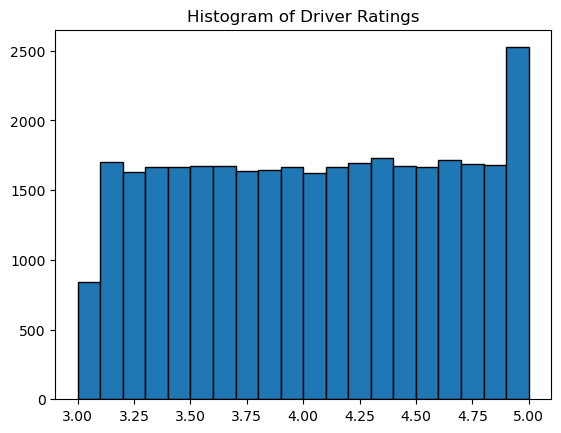

In [21]:
plt.hist(driver_ratings, bins=20, edgecolor='black')
plt.title('Histogram of Driver Ratings')

Text(0.5, 1.0, 'Vehicle Type Distribution')

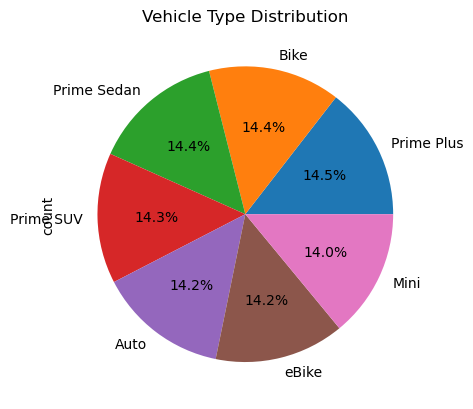

In [33]:
df['Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Vehicle Type Distribution')

Text(0.5, 1.0, 'Booking Status')

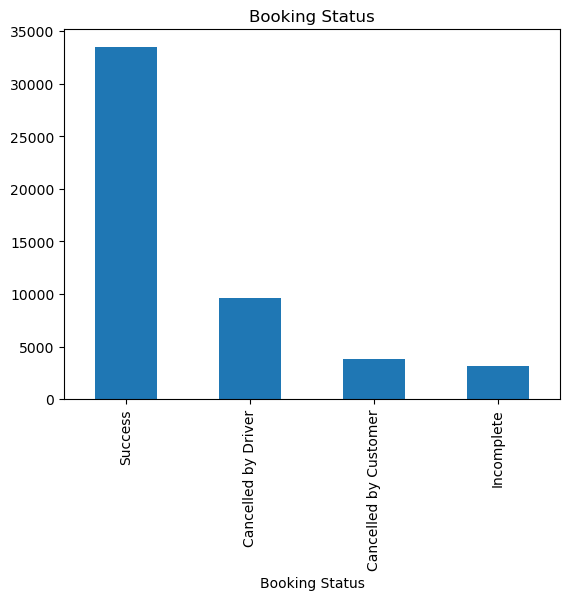

In [34]:
df['Booking Status'].value_counts().plot(kind='bar')
plt.title('Booking Status')

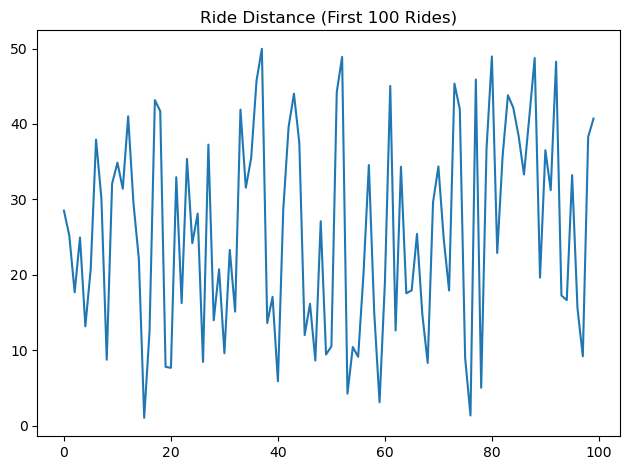

In [35]:
plt.plot(ride_distance[:100])
plt.title('Ride Distance (First 100 Rides)')


plt.tight_layout()
plt.show()

## 5. Seaborn Visualizations

Text(0.5, 1.0, 'Scatter: Ride Distance vs Booking Value')

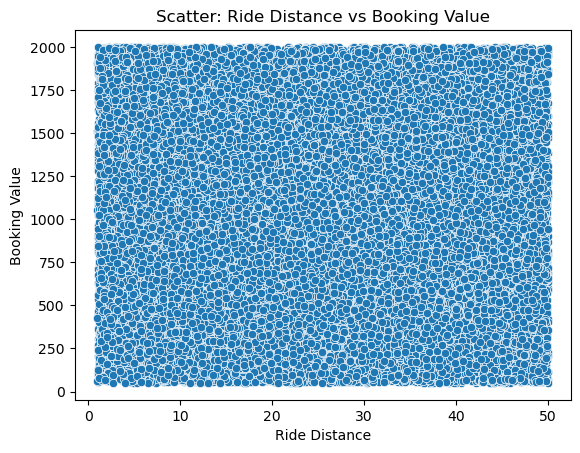

In [36]:
sns.scatterplot(x='Ride Distance', y='Booking Value', data=df)
plt.title('Scatter: Ride Distance vs Booking Value')


Text(0.5, 1.0, 'Line: First 50 Driver Ratings')

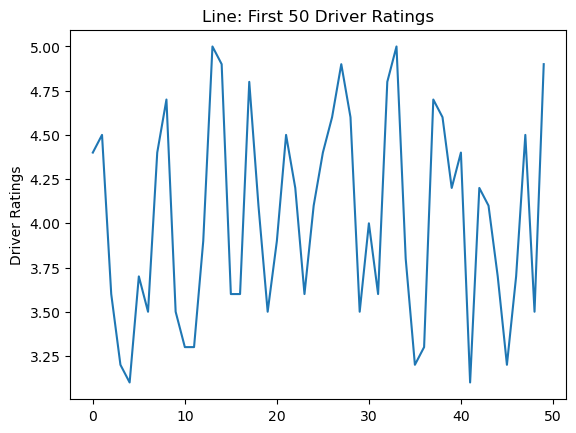

In [37]:
sns.lineplot(x=range(50), y=df['Driver Ratings'].dropna().head(50))
plt.title('Line: First 50 Driver Ratings')

Text(0.5, 1.0, 'Bar: Vehicle vs Booking Value')

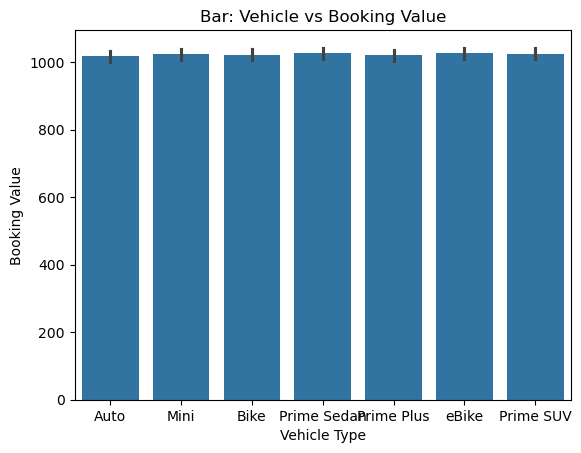

In [38]:
sns.barplot(x='Vehicle Type', y='Booking Value', data=df)
plt.title('Bar: Vehicle vs Booking Value')

Text(0.5, 1.0, 'Box: Payment Method vs Booking Value')

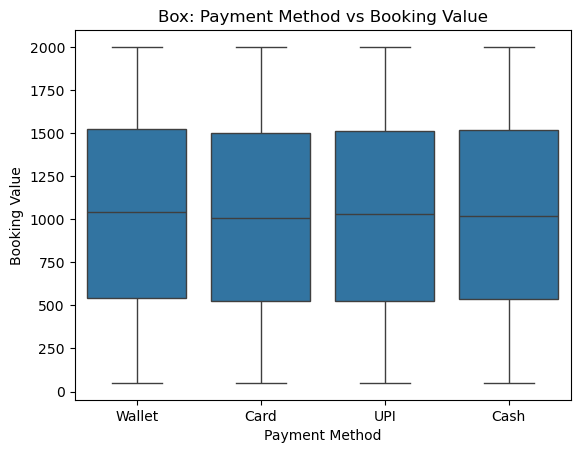

In [39]:
sns.boxplot(x='Payment Method', y='Booking Value', data=df)
plt.title('Box: Payment Method vs Booking Value')

Text(0.5, 1.0, 'Violin: Status vs Ride Distance')

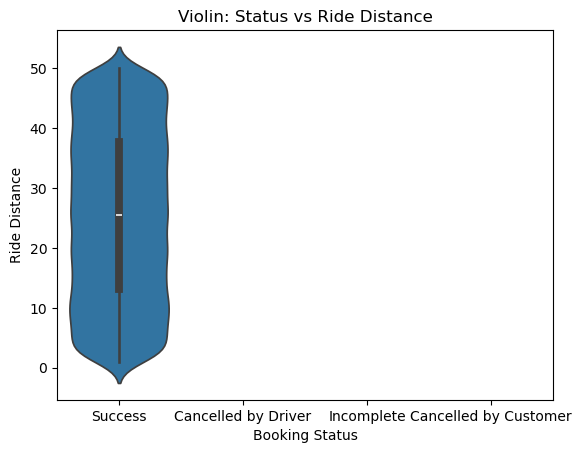

In [40]:
sns.violinplot(x='Booking Status', y='Ride Distance', data=df)
plt.title('Violin: Status vs Ride Distance')

Text(0.5, 1.0, 'Count: Booking Status')

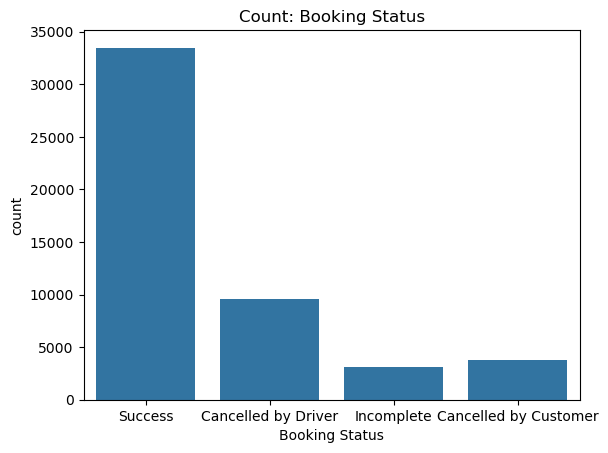

In [41]:
sns.countplot(x='Booking Status', data=df)
plt.title('Count: Booking Status')


Text(0.5, 1.0, 'KDE: Driver Ratings')

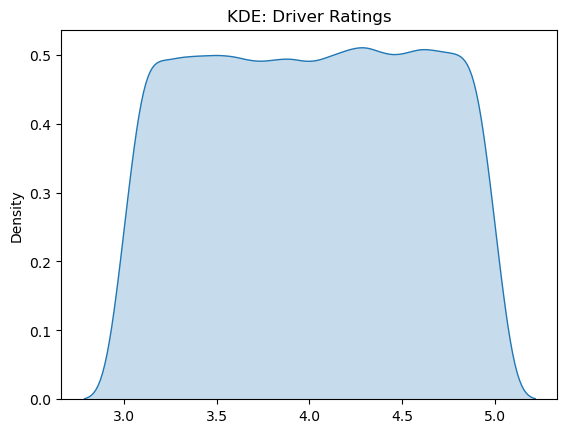

In [42]:
sns.kdeplot(driver_ratings, fill=True)
plt.title('KDE: Driver Ratings')

Text(0.5, 1.0, 'Distribution: Driver Ratings')

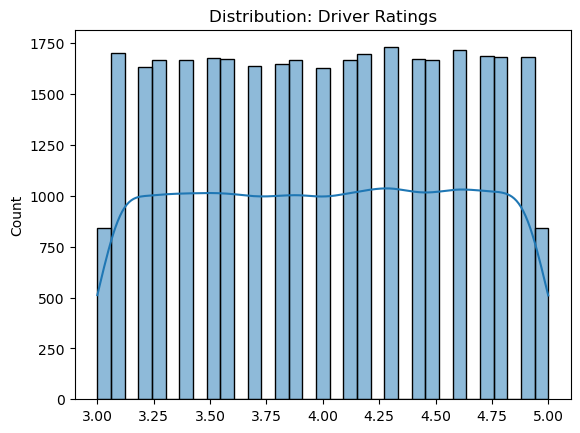

In [43]:
sns.histplot(driver_ratings, kde=True)
plt.title('Distribution: Driver Ratings')